# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 4.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [89]:
import pandas as pd

recipes_df = pd.read_csv('recipes_sample.csv')
reviews_df = pd.read_csv('reviews_sample.csv') 

recipes_df = recipes_df[['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']]
recipes_df = recipes_df.set_index('id')

reviews_df = reviews_df.rename(columns={'Unnamed: 0': 'id'})
reviews_df = reviews_df.set_index('id')

In [90]:
recipes_df.head()

,name,minutes,submitted,description,n_ingredients
id,,,,,
44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


In [91]:
reviews_df.head()

,user_id,recipe_id,date,rating,review
id,,,,,
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [92]:
recipes_sample = recipes_df.sample(frac=0.05, random_state=42)
reviews_sample = reviews_df.sample(frac=0.05, random_state=42)
with pd.ExcelWriter('recipes.xlsx', engine='openpyxl') as writer:
    recipes_sample.to_excel(writer, sheet_name='Рецепты', index=True)
    reviews_sample.to_excel(writer, sheet_name='Отзывы', index=True)

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [93]:
import xlwings as xw
import pandas as pd
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

df = sheet.used_range.options(pd.DataFrame, index=False).value

df['seconds_assign'] = df['minutes'] * 60
sheet.range('G1').value = 'seconds_assign'
sheet.range('A2').value = df.values.tolist()

wb.save()


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [94]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

df = sheet.used_range.options(pd.DataFrame, index=False).value

df['seconds_formula'] = '=C2*60'
sheet.range('H1').value = 'seconds_formula'
sheet.range('A2').value = df.values.tolist()

wb.save()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [95]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range('G1').font.bold = True
sheet.range('H1').font.bold = True

sheet.range('G1').api.HorizontalAlignment = -4108  
sheet.range('H1').api.HorizontalAlignment = -4108  


wb.save()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [96]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

last_row = sheet.range('A' + str(sheet.cells.last_cell.row)).end('up').row


minutes_range = sheet.range(f'C2:C{last_row}').value


for i, minutes in enumerate(minutes_range):
    cell = sheet.range(f'C{i+2}')
    if minutes < 5:
        cell.color = (0, 255, 0) 
    elif 5 <= minutes <= 10:
        cell.color = (255, 255, 0)  
    else:
        cell.color = (255, 0, 0) 

wb.save()

## Лабораторная работа 4.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [97]:
def validate():

    wb = xw.Book('recipes.xlsx')

    reviews_sheet = wb.sheets['Отзывы']
    recipes_sheet = wb.sheets['Рецепты']
    
    
    reviews_df = reviews_sheet.used_range.options(pd.DataFrame, index=False).value
    recipes_df = recipes_sheet.used_range.options(pd.DataFrame, index=False).value
    
    valid_recipe_ids = recipes_df['id'].tolist()
    
    last_row = reviews_sheet.range('A' + str(reviews_sheet.cells.last_cell.row)).end('up').row
    
    for i in range(2, last_row + 1): 
        row = reviews_sheet.range(f'A{i}:F{i}')
        rating = row[4].value  
        recipe_id = row[2].value 
        
        is_valid = True
        
        if not (isinstance(rating, (int, float)) and 0 <= rating <= 5):
            is_valid = False
            
        if recipe_id not in valid_recipe_ids:
            is_valid = False
            
        if not is_valid:
            row.color = (255, 0, 0)  
    
    
    wb.save()


validate()


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [98]:
import csv
import xlwings as xw
import pandas as pd

# Читаем CSV файл с разделителем табуляции
with open('recipes_model.csv', 'r', encoding='utf-8') as file:
    csv_data = list(csv.reader(file, delimiter='\t'))

# Создаем DataFrame
df = pd.DataFrame(csv_data)

# Создаем новую книгу Excel
wb = xw.Book()

# Создаем новый лист с именем 'Модель'
sheet = wb.sheets.add('Модель')

# Записываем данные начиная с A2
sheet.range('A2').value = df.values.tolist()

# Сохраняем файл
wb.save('recipes_model.xlsx')
wb.close()

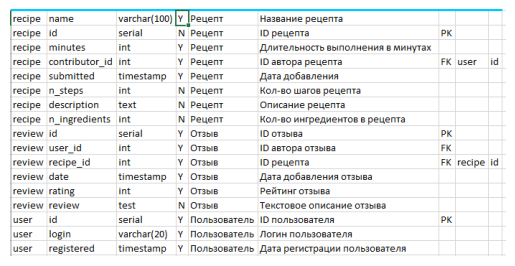

In [101]:
import matplotlib.pyplot as plt
img = plt.imread('image.png')
plt.imshow(img)
plt.axis('off')  
plt.show()